**Nombre**: Erik Navarrete 0401687561

[Ir al Repositorio](https://github.com/leonavam/mad/blob/master/Grafos-MAD.ipynb)

# Tarea Grafos

In [1]:
# Añadir librerías a utilizar
import networkx as nx  # Lib para crear grafos
import numpy as np #Lib para trabjar con las matrices de grafos

### Plantemiento de los grafos

Asumiendo que:

+ ***"otros"*** equivale a un candidato y que cada candidato es un vértice, tendremos V=6.
+ Como las menciones son de un candidato a otro y no están presentes dos, tenemos un Digrafo.
+ Las menciones de un candidato a otro serían los pesos de las aristas, que serán añadidos después para mostrar caminos ([Grafo Ponderado](#ponderado)).

Tendremos entonces:

> V { Pablo Iglesias, Pedro Sanchez, Albert Rivera, Pablo Casado, Santiago Abascal, Otros }

> **V** { 1, 2, 3, 4, 5, 6 }, como vértices o nodos del grafo.


## Debate de RTVE

In [2]:
# Crear un Digrafo G
G = nx.DiGraph()

# Añadir vértices
nodos = [1,2,3,4,5,6]
G.add_nodes_from(nodos)

# Añadir aristas/arcos con peso
arcos1 = [
    (1, 2),
    (1, 3),
    (1, 4),
    (1, 5),
    (1, 6)
]
arcos2 = [
    (2, 1),
    (2, 3),
    (2, 4),
    (2, 5),
    (2, 6)
]
arcos3 = [
    (3, 1),
    (3, 2),
    (3, 4),
    (3, 6)
]
arcos4 = [
    (4, 1),
    (4, 2),
    (4, 3),
    (4, 6)
]

G.add_edges_from(arcos1)
G.add_edges_from(arcos2)
G.add_edges_from(arcos3)
G.add_edges_from(arcos4)

nx.draw_circular(G, with_labels=True)

In [3]:
# Obteniendo la matriz de adyacencia
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 1 1 1]
 [1 0 1 1 1 1]
 [1 1 0 1 0 1]
 [1 1 1 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


## Debate de Atresmedia

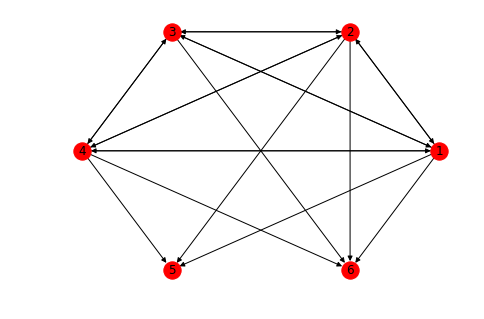

In [4]:
# Crear un Digrafo H
H = nx.DiGraph()
H.clear()

# Añadir vértices
nodos = [1,2,3,4,5,6]
H.add_nodes_from(nodos)

# Añadir aristas/arcos con peso
harcos1 = [
    (1, 2),
    (1, 3),
    (1, 4),
    (1, 5),
    (1, 6)
]
harcos2 = [
    (2, 1),
    (2, 3),
    (2, 4),
    (2, 5),
    (2, 6)
]
harcos3 = [
    (3, 1),
    (3, 2),
    (3, 4),
    (3, 6)
]
harcos4 = [
    (4, 1),
    (4, 2),
    (4, 3),
    (4, 5),
    (4, 6)
]

H.add_edges_from(harcos1)
H.add_edges_from(harcos2)
H.add_edges_from(harcos3)
H.add_edges_from(harcos4)

nx.draw_circular(H, with_labels=True)

In [5]:
# Obteniendo la matriz de adyacencia
hA = nx.adjacency_matrix(H)
print(hA.todense())

[[0 1 1 1 1 1]
 [1 0 1 1 1 1]
 [1 1 0 1 0 1]
 [1 1 1 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


## Temáticas a estudiar acerca de grafos

* [Grados de un Digrafo](#grado)
* [Matriz de Incidencia](#incidencia)
* [Grafos ponderados](#ponderado)
* [Grafos conexos](#conexo)
* [Orientabilidad de un Grafo](#orientable)
* [Grafos eulerianos](#eulerianos)


### Grado de un Digrafo <a name="grado"/>

> $\sum_{v \in V}d_{e}(V) = \sum_{v \in V}d_{s}(V)=\mid E \mid$

La sumatoria de los Grados de cada Vértice es igual al número de aristas.

+ Respecto al grafo G (el primero), encontrar sus grados correspondientes y verificar si la ecuación es verdadera

In [6]:
E = G.size() # obtiene el número de las aristas

ds = G.out_degree()
de = G.in_degree()

v_ds = 0
v_de = 0
# Encontrar el total de las tablas de grados que se obtiene con out_degree()
for d, k in ds:
    v_ds += k

for d, k in ds:
    v_de += k

if (v_ds == v_de and v_de == E):
    print("El grado del Digrafo es:", E, "Correcto!")

El grado del Digrafo es: 18 Correcto!


### Matriz de Incidencia <a name="incidencia"/>

La matriz de incidencia es una matriz binaria (sus elementos sólo pueden ser unos o ceros), que se utiliza como una forma de representar relaciones binarias.

- ***Construcción***
    1. Las columnas de la matriz representan las aristas del grafo.
    2. Las filas representan a los distintos nodos.
    3. Por cada nodo unido por una arista, ponemos un uno (1) en el lugar correspondiente, y llenamos el resto de las ubicaciones con ceros (0).
    
En el ejemplo de la siguiente figura, si sumamos las cantidades de 1's que hay en cada columna, veremos que hay solo dos, que representan los puntos de conexión entre una arista y sus vértices.
Si sumamos las cantidades de unos 1's que hay por cada fila comprobamos la cantidad de aristas que inciden sobre el vértice.

In [7]:
mi=nx.incidence_matrix(G)
print( mi.todense() )

[[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]]


In [8]:
# Se puede evidenciar las aristas incidentes con
print(G.degree())
# Que muestra una tupla {#nodo: valor de aristas incidentes}

[(1, 8), (2, 8), (3, 7), (4, 7), (5, 2), (6, 4)]


### Grafos ponderados <a name="ponderado"/>

Un grafo es ponderado si cada arista que lo constituye tiene un valor asociado, al que se llamará peso.
Este grafo utiliza una matriz de pesos que muestra el camino directo entre un nodo y otro.

+ En un gafo ponderado llamamos camino mas corto entre dos vértices dados al camino de peso mínimo entre dichos vértices.
+ En un grafo ponderado llamaremos camino mas largo o camino critico entre dos vértices al camino de peso máximo entre dichos vértices.

> Para el ejemplo se actualizará el Grafo G a un Grafo Ponderado (Hp) sin dirección para poder utilizar más herramientas de la libreria [NetworkX](https://networkx.github.io/documentation/stable/reference/algorithms/index.html):

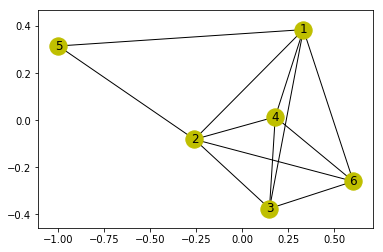

In [17]:
# Crear un Digrafo G
Gp = nx.DiGraph()
Gp.clear()
# Añadir vértices
nodos = [1,2,3,4,5,6]
Gp.add_nodes_from(nodos)

# Añadir aristas/arcos con peso
parcos1 = [
    (1, 2, 11), (1, 3, 7), (1, 4, 5), (1, 5, 1), (1, 6, 4)
]
parcos2 = [
    (2, 1, 3), (2, 3, 10), (2, 4, 18), (2, 5, 6), (2, 6, 1)
]
parcos3 = [
    (3, 1, 7), (3, 2, 21), (3, 4, 9), (3, 6, 17)
]
parcos4 = [
    (4, 1, 7), (4, 2, 21), (4, 3, 1), (4, 6, 16)
]

Gp.add_weighted_edges_from(parcos1)
Gp.add_weighted_edges_from(parcos2)
Gp.add_weighted_edges_from(parcos3)
Gp.add_weighted_edges_from(parcos4)

Hp = nx.Graph(Gp)

nx.draw_networkx(Hp, with_labels=True, node_color='y') #El dibujo será el mismo que el que se ha mostrado al inicio

In [10]:
# Verificamos si Gp es un Grafo Ponderado
if( nx.is_weighted(Hp)):
    print("Es un grafo ponderado")

Es un grafo ponderado


### Grafos conexos <a name="conexo"/>

Un grafo es conexo si todos sus vértices se alcanzan mutuamente; un digrafo se denominaría fuertemente conexo.

+ La matriz de accesos de un grafo conexo está formada sólo de 1's.
+ Si la matriz de acceso de un grafo está formada sólo por 1's, entonces el grafo es conexo.

In [11]:
# Esta sería la matriz de acceso del grafo Hp
mat_Acceso = [
    (1,1,1,1,1,1),
    (1,1,1,1,1,1),
    (1,1,1,1,1,1),
    (1,1,1,1,1,1),
    (1,1,1,1,1,1),
    (1,1,1,1,1,1),
]    

# Comprobar un grafo conexo
if(nx.is_connected(Hp)):
    print("Es un grafo conexo")

Es un grafo conexo


### Orientabilidad <a name="orientable"/>

La orientebilidad se aplica sólo sobre Grafos no dirigidos.

+ Un grafo es orientable si:
    1. Es conexo y
    2. No tiene aristas de puente

In [12]:
# En grafos conexos observamos que Hp es un grafo conexo
# Hay que identificar si existen aristas puente, si no las hay el grafo es orientable
if not( nx.has_bridges(Hp) ):
    print("El Grafo es orientable")

El Grafo es orientable


### Grafos eulerianos <a name="eulerianos"/>

+ Se llama cadena euleriana en G a toda cadena en G que pase por todas y cada una de sus aristas (respectivamente arcos) una sóla vez.
    + Cadena euleriana no cerrada -> Si parte de un vértice y termina en uno diferente
+ Se llama ciclo euleriano en G a toda cadena euleriana cerrada
    + Cadena euleriana cerrada o ***ciclo euleriano*** -> Si parte de un vértice y termina en el mismo

> Un grafo G se dice que es euleriano si posee un ciclo euleriano.

+ ***Grafos no dirigidos***
    + G es euleriano si y sólo si todos los vértices tienen grado par.
    + G tiene una cadena euleriana no cerrada si y sólo si G tiene exactamente dos vértices de grado impar (serán los extremos de la cadena)
    
+ ***Digrafos***
    + Sea G un digrafo debil conexo,
    + G es euleriano si y sólo si todos los vértices tiene el mismo grado de entrada que de salida
    + G tiene una cadena euleriana no cerrada si y sólo si existen dos vértices u y v tal que u tenga $d_e(u)=d_s(u)+1$ y $d_s(v)=d_e(v)+1$ => un vertice con una salida más que su entrada y otro con una entrada más que su salida.
        + Todos los vértices distintos de ***u*** y ***v*** tiene el mismo grado de entrada y salida

#### Grafos no dirigidos

El grafo generado es euleriano
Además todos sus vértices tienen grados pares, entiendase (Vértice, Grado)
[(0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


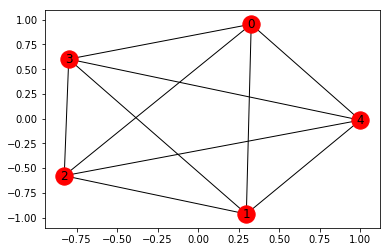

In [13]:
if(nx.is_eulerian(G) or nx.is_eulerian(H) or nx.is_eulerian(Hp)):
    print("Ya hemos creado un grafo euleriano!")
else:
    # Vamos a crear un grafo de prueba para evidenciar que si se puede utilizar la función is_eulerian(Grafo)
    # Tenemos un generador de grafos incluido en el sistema
    G_automatic = nx.complete_graph(5)
    nx.draw_networkx(G_automatic)
    if(nx.is_eulerian(G_automatic)):
        print("El grafo generado es euleriano")
        print("Además todos sus vértices tienen grados pares, entiendase (Vértice, Grado)")
        print(G_automatic.degree())


#### Digrafos

Es euleriano por eso ha sido dibujado


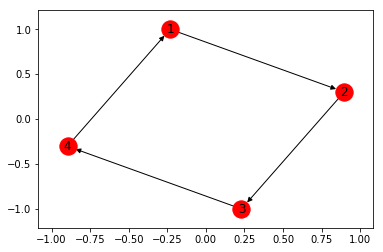

In [14]:
DI = nx.DiGraph()
DI.add_nodes_from([1,2,3,4])
edges=[
    (1,2),
    (2,3),
    (3,4),
    (4,1)
]
DI.add_edges_from(edges)
if(nx.is_eulerian(DI)):
    nx.draw_networkx(DI)
    print("Es euleriano por eso ha sido dibujado")

In [15]:
# Se comprueba que los vértices de entrada son los mismos que de salida
print(DI.out_degree)
print(DI.in_degree)

[(1, 1), (2, 1), (3, 1), (4, 1)]
[(1, 1), (2, 1), (3, 1), (4, 1)]


Salida [(1, 1), (2, 2), (3, 1), (4, 1)]
Entrada [(1, 1), (2, 1), (3, 1), (4, 2)]
No es euleriano pero SI tiene una cadena euleriana


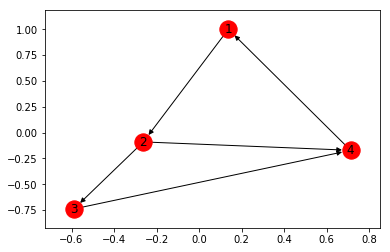

In [16]:
edges=[
    (1,2),
    (2,3),
    (2,4),
    (3,4),
    (4,1)
]
DI.add_edges_from(edges)
print("Salida",DI.out_degree)
print("Entrada",DI.in_degree)
if(nx.is_eulerian(DI)):
    print("Es euleriano")
else:
    count = 0
    for i, k in DI.out_degree:
        for j, m in DI.in_degree:
            if(i==j): # Si es el mismo vértice accede
                if(k<m or m<k):
                    if( (m-k == 1) or (k-m == 1) ):
                        count+=1
                    else:
                        break
            elif (count > 2):
                break
    
    if(count == 2):
        print("No es euleriano pero SI tiene una cadena euleriana")
    else:
        print("No es euleriano, ni tampoco tiene una cadena euleriana")
nx.draw_networkx(DI)

# Bibliografía

+ Networkx.github.io. (2019). Overview of NetworkX — NetworkX 2.3 documentation. Disponible en: [https://networkx.github.io/documentation/stable/index.html](https://networkx.github.io/documentation/stable/index.html) Consultado el 30 May 2019.
+ Es.wikipedia.org. (2019). Matriz de incidencia. [online] Available at: [https://es.wikipedia.org/wiki/Matriz_de_incidencia](https://es.wikipedia.org/wiki/Matriz_de_incidencia) Consultado 30 May 2019.